In [2]:
import matplotlib.pyplot as plt
import scipy.optimize as fit
import numpy as np

In [4]:
Npi = 100000           # pion number
Nmu = 0                # muon number
Nel = 0                # muon number
taupi = 26.0           # lifetime of pion (ns)
taumu = 2197.0         # lifetime of muon (ns)
dt = 1.0               # size of time interval (ns)
tmax = 1000             # time range (ns)
probpi = dt/taupi      # pi decay probability in interval dt
probmu = dt/taumu      # mu decay probability in interval dt

time = np.arange(0,tmax,dt)
Nplist = []
Nmlist = []
Nelist = []
Npdcylist = []
Nmdcylist = []

Npidecay = 0
Nmudecay = 0
for it in time: # loop over time steps

    Nplist.append(Npi)
    Nmlist.append(Nmu)
    Nelist.append(Nel)
    Npdcylist.append(Npidecay)
    Nmdcylist.append(Nmudecay)

    Npidecay = 0
    Nmudecay = 0
    for ip in range(Npi): # loop over surviving pions
        if np.random.ranf() < probpi:
            Npidecay += 1
    for im in range(Nmu): # loop over surviving muons
        if np.random.ranf() < probmu:
            Nmudecay += 1
    Npi -= Npidecay
    Nmu += Npidecay 
    Nmu -= Nmudecay
    Nel += Nmudecay

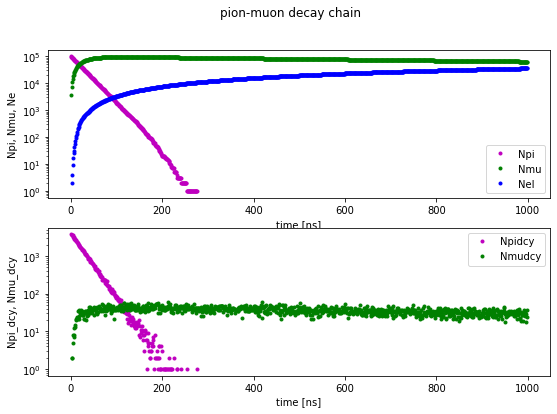

In [5]:
fig, axes = plt.subplots(2,figsize=(9, 6))
fig.suptitle('pion-muon decay chain')

axes[0].plot(time,Nplist,"m.",label="Npi")
axes[0].plot(time,Nmlist,"g.",label="Nmu")
axes[0].plot(time,Nelist,"b.",label="Nel")
axes[0].set_xlabel("time [ns]")
axes[0].set_ylabel("Npi, Nmu, Ne")
axes[0].set_yscale('log')
axes[0].legend()

axes[1].plot(time,Npdcylist,"m.",label="Npidcy")
axes[1].plot(time,Nmdcylist,"g.",label="Nmudcy")
axes[1].set_xlabel("time [ns]")
axes[1].set_ylabel("Npi_dcy, Nmu_dcy")
axes[1].set_yscale('log')
axes[1].legend()


pi-decay: tau_pi 25.54 +/-  0.10
pi-decay: tau_pi 21.59 +/-  2.75


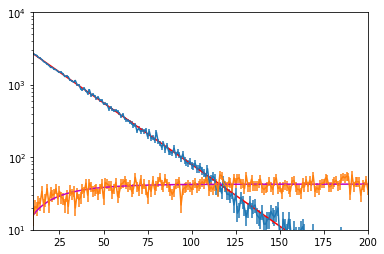

In [20]:
def fpdy(t, p1, p2):
    return p1*np.exp(-t/p2)

def fmdy(t, p1, p2, p3):
    return p1*( np.exp(-t/p3)-np.exp(-t/p2) )

tmin, tmax = 10,200

pars1, covs1 = fit.curve_fit(fpdy, time[tmin:tmax], Npdcylist[tmin:tmax], p0=[Npi,25.])
Nfit1 = fpdy(time, pars1[0], pars1[1])

pars2, covs2 = fit.curve_fit(fmdy, time[tmin:tmax], Nmdcylist[tmin:tmax], p0=[Npi,25.,2200])
Nfit2 = fmdy(time, pars2[0], pars2[1], pars2[2])

plt.errorbar(time,Npdcylist,yerr=np.sqrt(Npdcylist), mfc='blue')
plt.plot(time,Nfit1,"r-")
plt.errorbar(time,Nmdcylist,yerr=np.sqrt(Nmdcylist), mfc='green')
plt.plot(time,Nfit2,"m-")

plt.xlim(tmin,tmax)
plt.ylim(10,10000)
plt.yscale('log')
print( "pi-decay: tau_pi %5.2f +/- %5.2f" % (pars1[1], np.sqrt(covs1[1][1])))
print( "pi-decay: tau_pi %5.2f +/- %5.2f" % (pars2[1], np.sqrt(covs2[1][1])))

plt.savefig('fit with equal error.png')